In [1]:
# 1
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 2
basics = pd.read_csv("title_basics_data.tsv", delimiter = "\t")
basics.to_csv('title_basics_data_csv.csv')
basics.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [3]:
# 3
ratings = pd.read_csv("rating_data.tsv", delimiter = "\t")
basics.to_csv('rating_data_csv.csv')
ratings.head(5)

,tconst,averageRating,numVotes
0,tt0000001,5.6,1668
1,tt0000002,6.1,207
2,tt0000003,6.5,1392
3,tt0000004,6.2,123
4,tt0000005,6.2,2179


In [4]:
# 4
basics['startYear'] = pd.to_numeric(basics['startYear'], errors='coerce')

In [5]:
# 5
year = basics[(basics['startYear'] >= 2000) & (basics['startYear'] <= 2009) & (basics['titleType'] == "movie")]
year.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
15184,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000.0,\N,60,\N
34811,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,\N,118,"Comedy,Fantasy,Romance"
63462,tt0064730,movie,Japan Organized Crime Boss,Nihon boryoku-dan: Kumicho,0,2000.0,\N,97,"Action,Crime"
85714,tt0087608,movie,Leila wa al ziap,Leila wa al ziap,0,2008.0,\N,90,Documentary
86825,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,\N,100,"Comedy,Horror,Sci-Fi"
93967,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,\N,126,Drama
95409,tt0097540,movie,Responso,Responso,0,2004.0,\N,81,\N
100116,tt0102362,movie,Istota,Istota,0,2000.0,\N,80,"Drama,Romance"
105368,tt0107706,movie,Nothing,Nothing,0,2000.0,\N,\N,\N
106192,tt0108549,movie,West from North Goes South,West from North Goes South,0,2004.0,\N,96,"Comedy,Mystery"


In [6]:
# 6
merge_yr = pd.merge(year, ratings, on='tconst')
merge_yr.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000.0,\N,60,\N,5.4,11
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,\N,118,"Comedy,Fantasy,Romance",6.4,78683
2,tt0064730,movie,Japan Organized Crime Boss,Nihon boryoku-dan: Kumicho,0,2000.0,\N,97,"Action,Crime",7.0,172
3,tt0087608,movie,Leila wa al ziap,Leila wa al ziap,0,2008.0,\N,90,Documentary,7.7,13
4,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,\N,100,"Comedy,Horror,Sci-Fi",5.4,274
5,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,\N,126,Drama,5.8,641
6,tt0097540,movie,Responso,Responso,0,2004.0,\N,81,\N,7.4,5
7,tt0102362,movie,Istota,Istota,0,2000.0,\N,80,"Drama,Romance",4.8,10
8,tt0108549,movie,West from North Goes South,West from North Goes South,0,2004.0,\N,96,"Comedy,Mystery",7.7,23
9,tt0109173,movie,Auf allen Meeren,Auf allen Meeren,0,2002.0,\N,95,Documentary,7.8,26


In [7]:
# 7
popular_movies =  merge_yr.sort_values('numVotes', ascending = False)
popular_movies.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
19846,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008.0,\N,152,"Action,Crime,Drama",9.0,2286538
64,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0,2001.0,\N,178,"Action,Adventure,Drama",8.8,1648332
349,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003.0,\N,201,"Action,Adventure,Drama",8.9,1631652
350,tt0167261,movie,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Two Towers,0,2002.0,\N,179,"Action,Adventure,Drama",8.7,1475172
400,tt0172495,movie,Gladiator,Gladiator,0,2000.0,\N,155,"Action,Adventure,Drama",8.5,1332104
11558,tt0372784,movie,Batman Begins,Batman Begins,0,2005.0,\N,140,"Action,Adventure",8.2,1300069
10546,tt0361748,movie,Inglourious Basterds,Inglourious Basterds,0,2009.0,\N,153,"Adventure,Drama,War",8.3,1256747
14548,tt0407887,movie,The Departed,The Departed,0,2006.0,\N,151,"Crime,Drama,Thriller",8.5,1180900
21231,tt0482571,movie,The Prestige,The Prestige,0,2006.0,\N,130,"Drama,Mystery,Sci-Fi",8.5,1180732
1020,tt0209144,movie,Memento,Memento,0,2000.0,\N,113,"Mystery,Thriller",8.4,1118591


In [8]:
# 8
popular_movies.head(10)['averageRating'].mean()

8.580000000000002

In [9]:
# 9
votes = ratings[ratings['numVotes'] >= 1000]
votes.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.6,1668
2,tt0000003,6.5,1392
4,tt0000005,6.2,2179
7,tt0000008,5.4,1838
9,tt0000010,6.9,6146
11,tt0000012,7.4,10542
12,tt0000013,5.7,1597
13,tt0000014,7.1,4702
15,tt0000016,5.9,1220
21,tt0000023,5.7,1164


In [10]:
# 10
merge_bv = pd.merge(basics, votes, on = 'tconst')
merge_bv.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,\N,1,"Documentary,Short",5.6,1668
1,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,\N,4,"Animation,Comedy,Romance",6.5,1392
2,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,\N,1,"Comedy,Short",6.2,2179
3,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894.0,\N,1,"Documentary,Short",5.4,1838
4,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895.0,\N,1,"Documentary,Short",6.9,6146
5,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0,1896.0,\N,1,"Documentary,Short",7.4,10542
6,tt0000013,short,The Photographical Congress Arrives in Lyon,Neuville-sur-Saône: Débarquement du congrès de...,0,1895.0,\N,1,"Documentary,Short",5.7,1597
7,tt0000014,short,The Waterer Watered,L'arroseur arrosé,0,1895.0,\N,1,"Comedy,Short",7.1,4702
8,tt0000016,short,Barque sortant du port,Barque sortant du port,0,1895.0,\N,1,"Documentary,Short",5.9,1220
9,tt0000023,short,The Sea,Baignade en mer,0,1895.0,\N,1,"Documentary,Short",5.7,1164


In [11]:
# 11
year2 = merge_bv[(merge_bv['startYear'] >= 1900) & (merge_bv['startYear'] < 2000) & (merge_bv['titleType'] == "movie")]
year2.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
41,tt0002130,movie,Dante's Inferno,L'Inferno,0,1911.0,\N,71,"Adventure,Drama,Fantasy",7.0,2331
45,tt0002844,movie,Fantômas: In the Shadow of the Guillotine,Fantômas - À l'ombre de la guillotine,0,1913.0,\N,54,"Crime,Drama",7.0,1974
46,tt0003037,movie,Fantomas: The Man in Black,Juve contre Fantômas,0,1913.0,\N,61,"Crime,Drama",7.0,1368
47,tt0003165,movie,Fantômas: The Dead Man Who Killed,Le mort qui tue,0,1913.0,\N,90,"Crime,Drama,Mystery",7.0,1070
48,tt0003419,movie,The Student of Prague,Der Student von Prag,0,1913.0,\N,85,"Drama,Fantasy,Horror",6.5,1823
50,tt0003643,movie,The Avenging Conscience: or 'Thou Shalt Not Kill',The Avenging Conscience: or 'Thou Shalt Not Kill',0,1914.0,\N,78,"Crime,Drama,Horror",6.4,1133
52,tt0003740,movie,Cabiria,Cabiria,0,1914.0,\N,148,"Adventure,Drama,History",7.1,3148
55,tt0003930,movie,Fantomas: The Mysterious Finger Print,Fantômas contre Fantômas,0,1914.0,\N,59,"Crime,Drama",6.9,1177
58,tt0004026,movie,The Golem,Der Golem,0,1915.0,\N,60,Horror,6.8,1051
60,tt0004181,movie,Judith of Bethulia,Judith of Bethulia,0,1914.0,\N,61,Drama,6.1,1252


In [12]:
# 12
year2.tail(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
38259,tt1935109,movie,Dipu Number 2,Dipu Number 2,0,1996.0,\N,154,"Adventure,Family",8.9,2031
38939,tt2044774,movie,The High,El-Keif,0,1985.0,\N,118,"Comedy,Drama",8.5,1714
39741,tt2149814,movie,Wild Desire,Raghba Motawahesha,0,1992.0,\N,110,Drama,6.1,1779
39944,tt2186669,movie,48 Sa'aa Fi Israel,48 Sa'aa Fi Israel,0,1998.0,\N,\N,"Drama,Thriller",6.0,1760
40120,tt2210725,movie,Khamsa Bab,Khamsa Bab,0,1983.0,\N,\N,"Comedy,Drama",5.7,1552
40928,tt2330098,movie,Upendra,Upendra,0,1999.0,\N,138,"Drama,Thriller",8.8,2431
44125,tt3178292,movie,A: Film by Upendra,A: Film by Upendra,0,1998.0,\N,150,Drama,8.7,1723
44176,tt3189256,movie,Om,Om,0,1995.0,\N,150,"Action,Crime,Drama",8.8,2600
46431,tt3834956,movie,Mission in Tel Aviv,Mohemma Fi Tel Aviv,0,1992.0,\N,118,Thriller,5.7,1626
54438,tt6725014,movie,Scenes from a Marriage,Scener ur ett äktenskap,0,1974.0,\N,169,Drama,8.4,4266


In [13]:
# 13
result = year2.groupby('startYear').agg(values = ('averageRating', np.mean)).reset_index()
result

,startYear,values
0,1911.0,7.000000
1,1913.0,6.875000
2,1914.0,6.560000
3,1915.0,6.760000
4,1916.0,6.950000
...,...,...
83,1995.0,6.428836
84,1996.0,6.326515
85,1997.0,6.416476
86,1998.0,6.425386


In [14]:
# 14
maximum = 0
final_year = 0
for i in range(1, len(result)):
    x = result.loc[i, 'values']
    y = result.loc[i-1, 'values']
    temp = abs(x - y)
    if (temp > maximum):
        maximum = temp
        final_year = result.loc[[i], ['startYear']]
final_year

,startYear
17,1929.0


In [15]:
# 15
merge_bv.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,\N,1,"Documentary,Short",5.6,1668
1,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,\N,4,"Animation,Comedy,Romance",6.5,1392
2,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,\N,1,"Comedy,Short",6.2,2179
3,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894.0,\N,1,"Documentary,Short",5.4,1838
4,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895.0,\N,1,"Documentary,Short",6.9,6146
5,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0,1896.0,\N,1,"Documentary,Short",7.4,10542
6,tt0000013,short,The Photographical Congress Arrives in Lyon,Neuville-sur-Saône: Débarquement du congrès de...,0,1895.0,\N,1,"Documentary,Short",5.7,1597
7,tt0000014,short,The Waterer Watered,L'arroseur arrosé,0,1895.0,\N,1,"Comedy,Short",7.1,4702
8,tt0000016,short,Barque sortant du port,Barque sortant du port,0,1895.0,\N,1,"Documentary,Short",5.9,1220
9,tt0000023,short,The Sea,Baignade en mer,0,1895.0,\N,1,"Documentary,Short",5.7,1164


In [16]:
# 16
movies = merge_bv[merge_bv['titleType'] == "movie"]
movies

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
41,tt0002130,movie,Dante's Inferno,L'Inferno,0,1911.0,\N,71,"Adventure,Drama,Fantasy",7.0,2331
45,tt0002844,movie,Fantômas: In the Shadow of the Guillotine,Fantômas - À l'ombre de la guillotine,0,1913.0,\N,54,"Crime,Drama",7.0,1974
46,tt0003037,movie,Fantomas: The Man in Black,Juve contre Fantômas,0,1913.0,\N,61,"Crime,Drama",7.0,1368
47,tt0003165,movie,Fantômas: The Dead Man Who Killed,Le mort qui tue,0,1913.0,\N,90,"Crime,Drama,Mystery",7.0,1070
48,tt0003419,movie,The Student of Prague,Der Student von Prag,0,1913.0,\N,85,"Drama,Fantasy,Horror",6.5,1823
...,...,...,...,...,...,...,...,...,...,...,...
59283,tt9894470,movie,VFW,VFW,0,2019.0,\N,92,"Action,Crime,Horror",6.1,5221
59286,tt9898858,movie,Coffee & Kareem,Coffee & Kareem,0,2020.0,\N,88,"Action,Comedy",5.1,11394
59292,tt9900782,movie,Kaithi,Kaithi,0,2019.0,\N,145,"Action,Thriller",8.5,10887
59293,tt9904802,movie,Enemy Lines,Enemy Lines,0,2020.0,\N,92,War,4.8,1099


In [17]:
# 17
eachyear = movies.groupby('startYear').agg(avg = ('averageRating', np.mean)).reset_index()

In [18]:
# 18
eachyear

,startYear,avg
0,1911.0,7.000000
1,1913.0,6.875000
2,1914.0,6.560000
3,1915.0,6.760000
4,1916.0,6.950000
...,...,...
104,2016.0,6.187610
105,2017.0,6.168917
106,2018.0,6.265904
107,2019.0,6.301036


In [19]:
# 19
eachyear.tail(10)

,startYear,avg
99,2011.0,6.163610
100,2012.0,6.145479
101,2013.0,6.198722
102,2014.0,6.188996
103,2015.0,6.185207
104,2016.0,6.187610
105,2017.0,6.168917
106,2018.0,6.265904
107,2019.0,6.301036
108,2020.0,6.069435


In [20]:
# 20
eachyear = eachyear[eachyear['startYear'] != 2013]
eachyear

,startYear,avg
0,1911.0,7.000000
1,1913.0,6.875000
2,1914.0,6.560000
3,1915.0,6.760000
4,1916.0,6.950000
...,...,...
104,2016.0,6.187610
105,2017.0,6.168917
106,2018.0,6.265904
107,2019.0,6.301036


In [21]:
# 21
eachyear.tail(10)

,startYear,avg
98,2010.0,6.258824
99,2011.0,6.163610
100,2012.0,6.145479
102,2014.0,6.188996
103,2015.0,6.185207
104,2016.0,6.187610
105,2017.0,6.168917
106,2018.0,6.265904
107,2019.0,6.301036
108,2020.0,6.069435


In [22]:
# 22
from sklearn.linear_model import LinearRegression
x = eachyear['startYear'].values.reshape(-1,1)
y = eachyear['avg'].values.reshape(-1,1)

In [23]:
# 23
model = LinearRegression().fit(x,y)

In [24]:
# 24
xtest = np.array([2013]).reshape(-1,1)
y_pred = model.predict(xtest)
print(y_pred)

[[6.23598443]]


In [25]:
#25 Visualization
import matplotlib.pyplot as plt

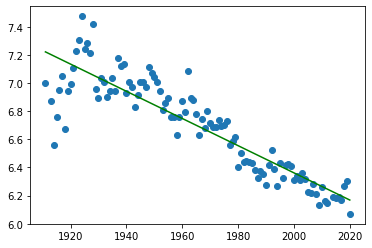

In [26]:
# 26
pred2 = model.predict(x)
plt.scatter(x, y)
plt.plot(x, pred2, color='green')
plt.show()

In [27]:
# 27
year3 = basics[(basics['startYear']>= 1900) & (basics['startYear'] < 2000) & (basics['titleType'] == "movie")]

In [28]:
# 28
year3.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
331,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900.0,\N,\N,"Biography,Drama"
498,tt0000502,movie,Bohemios,Bohemios,0,1905.0,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906.0,\N,70,"Biography,Crime,Drama"
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907.0,\N,\N,Drama
625,tt0000630,movie,Hamlet,Amleto,0,1908.0,\N,\N,Drama
668,tt0000675,movie,Don Quijote,Don Quijote,0,1908.0,\N,\N,Drama
669,tt0000676,movie,Don Álvaro o la fuerza del sino,Don Álvaro o la fuerza del sino,0,1908.0,\N,\N,Drama
672,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908.0,\N,120,"Adventure,Fantasy"
729,tt0000739,movie,El pastorcito de Torrente,El pastorcito de Torrente,0,1908.0,\N,\N,Drama
783,tt0000793,movie,Andreas Hofer,Andreas Hofer,0,1909.0,\N,\N,Drama


In [29]:
# 29
merge_ry = pd.merge(ratings, year3, on = 'tconst')
merge_ry.head(10)

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000335,6.0,39,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900.0,\N,\N,"Biography,Drama"
1,tt0000502,4.5,8,movie,Bohemios,Bohemios,0,1905.0,\N,100,\N
2,tt0000574,6.1,608,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906.0,\N,70,"Biography,Crime,Drama"
3,tt0000615,4.5,14,movie,Robbery Under Arms,Robbery Under Arms,0,1907.0,\N,\N,Drama
4,tt0000630,3.2,11,movie,Hamlet,Amleto,0,1908.0,\N,\N,Drama
5,tt0000675,4.9,9,movie,Don Quijote,Don Quijote,0,1908.0,\N,\N,Drama
6,tt0000676,4.4,8,movie,Don Álvaro o la fuerza del sino,Don Álvaro o la fuerza del sino,0,1908.0,\N,\N,Drama
7,tt0000679,5.2,35,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908.0,\N,120,"Adventure,Fantasy"
8,tt0000739,6.3,7,movie,El pastorcito de Torrente,El pastorcito de Torrente,0,1908.0,\N,\N,Drama
9,tt0000793,5.0,7,movie,Andreas Hofer,Andreas Hofer,0,1909.0,\N,\N,Drama


In [30]:
# 30
years = list(merge_ry['startYear'].unique())
Corr_year = pd.DataFrame()
for year in years:
    X = merge_ry[merge_ry['startYear']==year].iloc[:,[1,2]]
    corr = X.corr()
    corr = corr['averageRating'][1]
    newRow = {'Correlation':corr,'Year':year}
    Corr_year = Corr_year.append(newRow, ignore_index=True)
Corr_year = Corr_year.reindex(columns=['Year', 'Correlation'])
Corr_year

,Year,Correlation
0,1900.0,-0.189051
1,1905.0,0.329072
2,1906.0,0.910193
3,1907.0,-0.065269
4,1908.0,-0.027588
...,...,...
95,1997.0,0.105978
96,1903.0,0.739733
97,1902.0,-0.316438
98,1904.0,0.579870


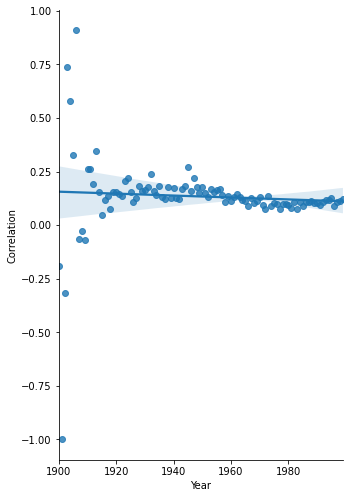

In [31]:
# 31
import seaborn as sns
sns.pairplot(Corr_year, x_vars='Year', y_vars='Correlation', size=7, aspect=0.7, kind='reg')